In [79]:
from PIL import Image, ImageDraw

code = "3"
input_image = Image.open("input" + code + ".jpg")
input_pixels = input_image.load()

kernel = [[  1  , 2 ,    1 ],
          [2 ,   4  , 2 ],
         [  1  , 2 ,    1 ]]

#Vert

#kernel = [[  0  , 0 ,    -0.75 , 0   ,0],
#          [0 ,   0  , -0.75   ,0   ,0],
#          [  0  , 0,    3 ,   0,   0],
#         [  0  , 0,    -0.75 ,   0,   0],
#         [  0  , 0,    -0.75 ,   0,   0]]

#Hori


#kernel = [[  0  , 0 ,    -0.75 , 0   ,0],
 #         [0 ,   0  , -0.75   ,0   ,0],
  #        [  0  , 0,    1.5 ,   0,   0],
   #      [  0  , 0,    0 ,   0,   0],
    #     [  0  , 0,    0,   0,   0]]


#Diag

#kernel = [[  0  , 0 ,    -1.5 , 0   ,0],
#          [0 ,   -1.5  , 0   ,-1.5   ,0],
#          [  -1.5  , 0,    9 ,   0,   -1.5],
#         [  0  , -1.5,    0 ,   -1.5,   0],
#         [  0  , 0,    -1.5 ,   0,   -1.5]]

#kernel = [[  0  , 1 ,    -0.75 , 0   ,0],
 #         [0 ,   1  , -0.75   ,0   ,0],
  #        [  0  , 1,    3 ,   0,   0],
   #      [  0  , 0,    -0.75 ,   0,   0],
    #     [  0  , 0,    -0.75 ,   0,   0]]




# Middle of the kernel
offset = len(kernel) // 2

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

# Compute convolution with kernel
for x in range(offset, input_image.width - offset):
    for y in range(offset, input_image.height - offset):
        acc = [0, 0, 0, 0, 0]
        for a in range(len(kernel)):
            for b in range(len(kernel)):
                xn = x + a - offset
                yn = y + b - offset
                pixel = input_pixels[xn, yn]
                acc[0] += pixel[0] * kernel[a][b]
                acc[1] += pixel[1] * kernel[a][b]
                acc[2] += pixel[2] * kernel[a][b]

        draw.point((x, y), (int(acc[0]), int(acc[1]), int(acc[2])))
        

    
output_image.save("outputTeste" + code + ".png")




In [1]:
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import misc # pip install Pillow
import matplotlib.pylab as pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)

/home/joaomcouto/anaconda3/lib/python3.8/site-packages/imageio/plugins/_tifffile.py:2983: UserWarning: invalid page offset (2594153384)
  warnings.warn('invalid page offset (%i)' % offset)


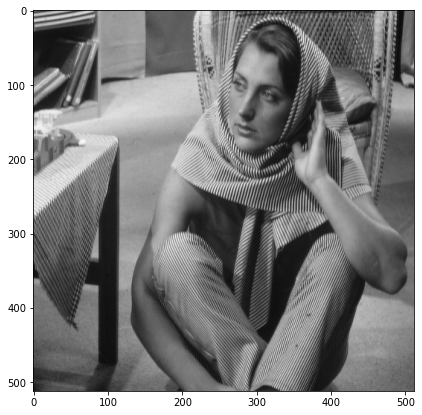

In [2]:
import imageio

im =  imageio.imread("barb.tif")

# im = misc.imread("barbara.png").astype(float)

f = plt.figure()
plt.imshow(im,cmap='gray')

In [3]:
from scipy.fftpack import ifft, idct
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [4]:

imsize = im.shape
dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        print(i,j)
        dct[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )

0 0
0 8
0 16
0 24
0 32
0 40
0 48
0 56
0 64
0 72
0 80
0 88
0 96
0 104
0 112
0 120
0 128
0 136
0 144
0 152
0 160
0 168
0 176
0 184
0 192
0 200
0 208
0 216
0 224
0 232
0 240
0 248
0 256
0 264
0 272
0 280
0 288
0 296
0 304
0 312
0 320
0 328
0 336
0 344
0 352
0 360
0 368
0 376
0 384
0 392
0 400
0 408
0 416
0 424
0 432
0 440
0 448
0 456
0 464
0 472
0 480
0 488
0 496
0 504
8 0
8 8
8 16
8 24
8 32
8 40
8 48
8 56
8 64
8 72
8 80
8 88
8 96
8 104
8 112
8 120
8 128
8 136
8 144
8 152
8 160
8 168
8 176
8 184
8 192
8 200
8 208
8 216
8 224
8 232
8 240
8 248
8 256
8 264
8 272
8 280
8 288
8 296
8 304
8 312
8 320
8 328
8 336
8 344
8 352
8 360
8 368
8 376
8 384
8 392
8 400
8 408
8 416
8 424
8 432
8 440
8 448
8 456
8 464
8 472
8 480
8 488
8 496
8 504
16 0
16 8
16 16
16 24
16 32
16 40
16 48
16 56
16 64
16 72
16 80
16 88
16 96
16 104
16 112
16 120
16 128
16 136
16 144
16 152
16 160
16 168
16 176
16 184
16 192
16 200
16 208
16 216
16 224
16 232
16 240
16 248
16 256
16 264
16 272
16 280
16 288
16 296
16 304
16 3

248 352
248 360
248 368
248 376
248 384
248 392
248 400
248 408
248 416
248 424
248 432
248 440
248 448
248 456
248 464
248 472
248 480
248 488
248 496
248 504
256 0
256 8
256 16
256 24
256 32
256 40
256 48
256 56
256 64
256 72
256 80
256 88
256 96
256 104
256 112
256 120
256 128
256 136
256 144
256 152
256 160
256 168
256 176
256 184
256 192
256 200
256 208
256 216
256 224
256 232
256 240
256 248
256 256
256 264
256 272
256 280
256 288
256 296
256 304
256 312
256 320
256 328
256 336
256 344
256 352
256 360
256 368
256 376
256 384
256 392
256 400
256 408
256 416
256 424
256 432
256 440
256 448
256 456
256 464
256 472
256 480
256 488
256 496
256 504
264 0
264 8
264 16
264 24
264 32
264 40
264 48
264 56
264 64
264 72
264 80
264 88
264 96
264 104
264 112
264 120
264 128
264 136
264 144
264 152
264 160
264 168
264 176
264 184
264 192
264 200
264 208
264 216
264 224
264 232
264 240
264 248
264 256
264 264
264 272
264 280
264 288
264 296
264 304
264 312
264 320
264 328
264 336
264 344
264 35

448 200
448 208
448 216
448 224
448 232
448 240
448 248
448 256
448 264
448 272
448 280
448 288
448 296
448 304
448 312
448 320
448 328
448 336
448 344
448 352
448 360
448 368
448 376
448 384
448 392
448 400
448 408
448 416
448 424
448 432
448 440
448 448
448 456
448 464
448 472
448 480
448 488
448 496
448 504
456 0
456 8
456 16
456 24
456 32
456 40
456 48
456 56
456 64
456 72
456 80
456 88
456 96
456 104
456 112
456 120
456 128
456 136
456 144
456 152
456 160
456 168
456 176
456 184
456 192
456 200
456 208
456 216
456 224
456 232
456 240
456 248
456 256
456 264
456 272
456 280
456 288
456 296
456 304
456 312
456 320
456 328
456 336
456 344
456 352
456 360
456 368
456 376
456 384
456 392
456 400
456 408
456 416
456 424
456 432
456 440
456 448
456 456
456 464
456 472
456 480
456 488
456 496
456 504
464 0
464 8
464 16
464 24
464 32
464 40
464 48
464 56
464 64
464 72
464 80
464 88
464 96
464 104
464 112
464 120
464 128
464 136
464 144
464 152
464 160
464 168
464 176
464 184
464 192
464 20

In [8]:
im

Array([[168, 163, 159, ..., 109, 104, 100],
       [134, 127, 126, ..., 110, 105,  96],
       [ 90,  84,  79, ..., 113, 104,  97],
       ...,
       [ 36,  37,  35, ..., 103, 103,  98],
       [ 36,  38,  41, ..., 107, 102, 100],
       [ 38,  39,  40, ..., 107, 104,  98]], dtype=uint8)

In [14]:
dct.round()

array([[1082.,   10.,    2., ...,    6.,    3.,    0.],
       [-196.,   24.,    8., ...,    2.,    0.,    0.],
       [ 169.,   62.,   -8., ...,    0.,    0.,    0.],
       ...,
       [   0.,    2.,    0., ...,    0.,    0.,    0.],
       [  -3.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

Text(0.5, 1.0, '8x8 DCTs of the image')

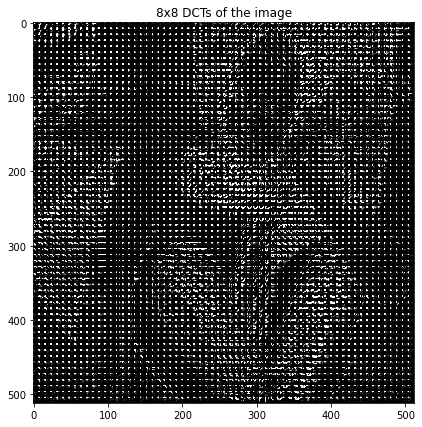

In [10]:
# Display entire DCT
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

In [12]:
im_dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct[i:(i+8),j:(j+8)].round() )

Text(0.5, 1.0, 'Comparação: original vs DCT com coeficientes de menor frequencia removidos')

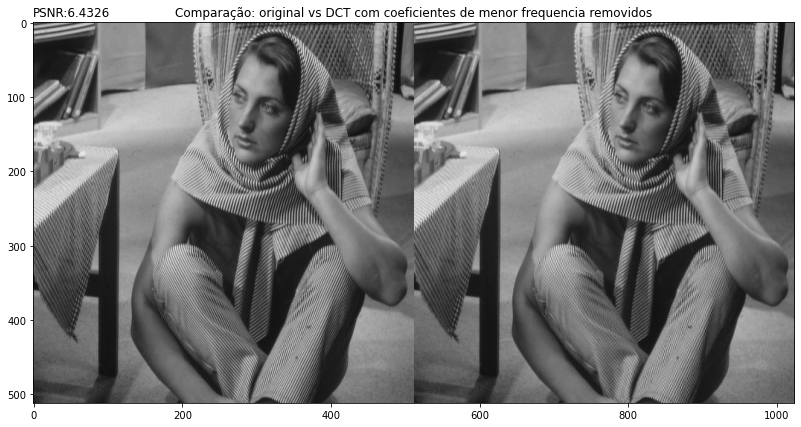

In [13]:
plt.figure()
plt.imshow( np.hstack( (im, im_dct) ) ,cmap='gray')
plt.title('PSNR:6.4326', loc='left')
plt.title("Comparação: original vs DCT com coeficientes de menor frequencia removidos" )

In [ ]:
"""#Zerando try 2
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        temp = dct[i:(i+8),j:(j+8)]
        print("antes:", temp.round(1))
        for dim1 in range(8):
            for dim2 in range(8):
                #print(i,j, ":", dim1,dim2)
                if( ((dim1+dim2)%16) > 8):
                    temp[dim1, dim2] = 0
        print("depois:", temp.round(1))
        dct[i:(i+8),j:(j+8)] = temp """

In [5]:
#Questao 2
for i in r_[:imsize[0]:8]:

    for j in r_[:imsize[1]:8]:
        for dim1 in range(8):
            #print("dim1:", dim1)
            for dim2 in range(7-dim1,8,1):
                #print(dim1,dim2)
                #a = dim1+dim2 > 7
                #print(i,j, ":", dim1,dim2)
                #if( ((dim1+dim2)%14) > 6):
                    #dct[dim1, dim2] = 0
                dct[i+dim1,dim2+j] = 0 

In [5]:
#Questao 3
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        for dim1 in range(8):
            #print("dim1:", dim1)
            for dim2 in range(0,7-dim1,1):
                #print(dim1,dim2)
                #a = dim1+dim2 > 7
                #print(i,j, ":", dim1,dim2)
                #if( ((dim1+dim2)%14) > 6):
                    #dct[dim1, dim2] = 0
                dct[i+dim1,dim2+j] = 0 

In [ ]:
"""
matriz = np.random.rand(8,8) 
matriz.round(1)
#Zerando saporra
for i in r_[:matriz[0]:8]:
    for j in r_[:matriz[1]:8]:
        for dim1 in range(i,i+8):
            for dim2 in range(j,j+8):
                print(i,j, ":", dim1,dim2)
                if( ((dim1+dim2)%16) > 8):
                    matriz[dim1, dim2] = 0
                    """

Text(0.5, 1.0, 'Exemplo de bloco 8x8 após remoção de coeficientes referentes a baixas frequencias')

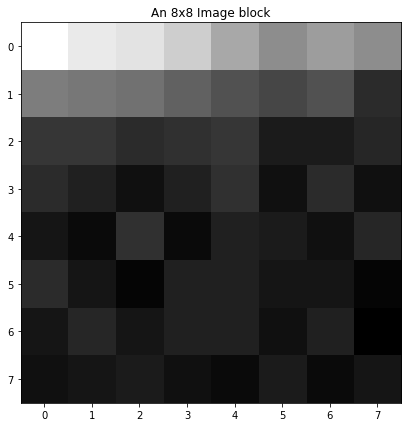

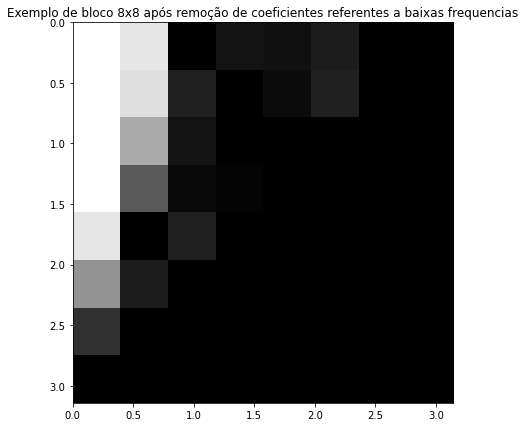

In [6]:

pos = 24


# Extract a block from image
plt.figure()
plt.imshow(im[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "An 8x8 Image block")

# Display the dct of that block
plt.figure()
plt.imshow(dct[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
plt.title( "Exemplo de bloco 8x8 após remoção de coeficientes referentes a baixas frequencias")

Text(0.5, 1.0, '8x8 DCTs of the image')

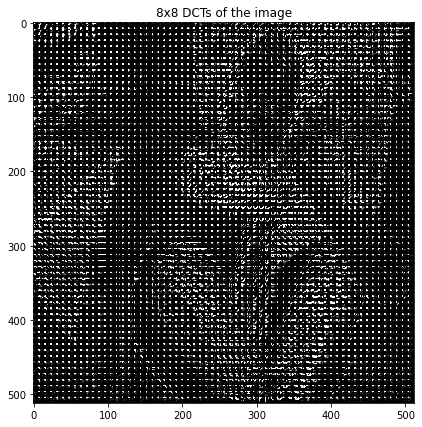

In [7]:
# Display entire DCT
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

In [ ]:
""" #processamento de dct que veio da pagina do tutorial
# Threshold
thresh = 0.012
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))


plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 8x8 DCTs of the image")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

#print "Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0)
"""

Text(0.5, 1.0, 'Comparação: original vs DCT com coeficientes de menor frequencia removidos')

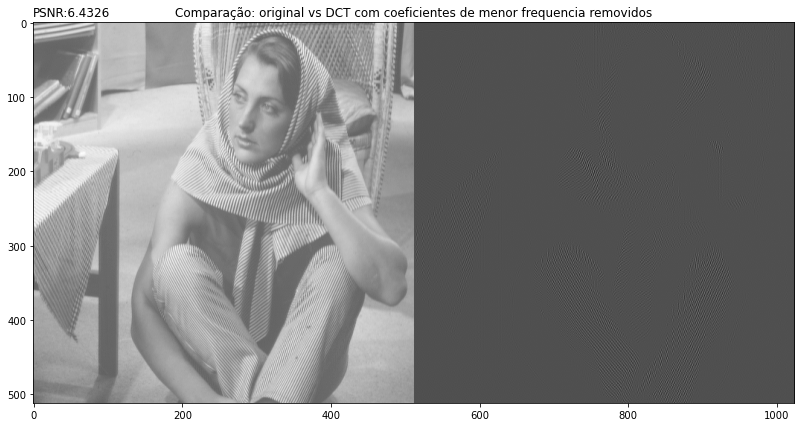

In [13]:
im_dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.imshow( np.hstack( (im, im_dct) ) ,cmap='gray')
plt.title('PSNR:6.4326', loc='left')
plt.title("Comparação: original vs DCT com coeficientes de menor frequencia removidos" )

In [9]:
from math import log10, sqrt 
import cv2 
import numpy as np 
  
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

In [12]:
PSNR(im, im_dct)

6.43268650166179

In [47]:
import imageio
import operator
im =  imageio.imread("barb.tif")
imSize = im.shape

padIncrease = 15
paddedSize = tuple(map(operator.add, im.shape, (padIncrease*2,padIncrease*2)))

padded = np.zeros(paddedSize)
padded[padIncrease:imSize[0]+padIncrease,padIncrease:imSize[1]+padIncrease] = im


In [48]:
padded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

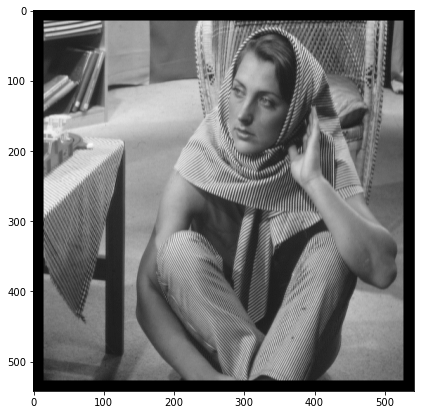

In [49]:
f = plt.figure()
plt.imshow(padded,cmap='gray')

In [ ]:
import numpy as np
import scipy
import scipy.misc
import matplotlib.pyplot as plt
from scipy import ndimage
from PIL import Image

img = Image.open('input1.jpg').convert('L')
img.save('output_file.jpg')

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f) ## shift for centering 0.0 (x,y)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## removing low frequency contents by applying a 60x60 rectangle window (for masking)
rows = np.size(img, 0) #taking the size of the image
cols = np.size(img, 1)
crow, ccol = rows/2, cols/2


print("crow: " , rows, cols) 
crow = int(crow )
ccol = int(crow)  

fshift[crow-200:crow+200, ccol-200:ccol+200] = 0
f_ishift= np.fft.ifftshift(fshift)

img_back = np.fft.ifft2(f_ishift) ## shift for centering 0.0 (x,y)
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after removing low freq'), plt.xticks([]), plt.yticks([])


In [ ]:
original = np.copy(fshift)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift= np.fft.ifftshift(original - fshift)
img_back = np.fft.ifft2(f_ishift) ## shift for centering 0.0 (x,y)
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after removing low freq'), plt.xticks([]), plt.yticks([])


In [ ]:
fshift.shape

In [ ]:
for a in range (600):
    for b in range(1024):
        if((a+b) < 1024):
            fshift[a,b]=-1000

In [ ]:
f_ishift= np.fft.ifftshift(fshift)

img_back = np.fft.ifft2(f_ishift) ## shift for centering 0.0 (x,y)
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')